In [115]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.decomposition import PCA

In [116]:
data = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""

In [117]:
sentences = data.split(".")

In [118]:
sentences

['We are about to study the idea of a computational process',
 '\nComputational processes are abstract beings that inhabit computers',
 '\nAs they evolve, processes manipulate other abstract things called data',
 '\nThe evolution of a process is directed by a pattern of rules\ncalled a program',
 ' People create programs to direct processes',
 ' In effect,\nwe conjure the spirits of the computer with our spells',
 '']

In [119]:
#clean data
clean_sentences=[]
for sentence in sentences:
    if sentence =="":
        continue
    sentence = re.sub('[^A-Za-z0-9]+',' ',sentence)
    sentence = re.sub('r(?:^| )\w(?:$| )',' ',sentence).strip()
    sentence = sentence.lower()
    clean_sentences.append(sentence)

In [120]:
clean_sentences

['we are about to study the idea of a computational process',
 'computational processes are abstract beings that inhabit computers',
 'as they evolve processes manipulate other abstract things called data',
 'the evolution of a process is directed by a pattern of rules called a program',
 'people create programs to direct processes',
 'in effect we conjure the spirits of the computer with our spells']

In [121]:
corpus = clean_sentences

In [122]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
print(sequences)

[[5, 6, 12, 7, 13, 1, 14, 2, 3, 8, 9], [8, 4, 6, 10, 15, 16, 17, 18], [19, 20, 21, 4, 22, 23, 10, 24, 11, 25], [1, 26, 2, 3, 9, 27, 28, 29, 3, 30, 2, 31, 11, 3, 32], [33, 34, 35, 7, 36, 4], [37, 38, 5, 39, 1, 40, 2, 1, 41, 42, 43, 44]]


In [123]:
index_to_word_map={}
word_to_index_map={}

for index_1, sequence in enumerate(sequences):
    print(sequence)
    word_in_sentence = clean_sentences[index_1].split()
    print(word_in_sentence)
    for index_2, value in enumerate(sequence):
        index_to_word_map[value]=word_in_sentence[index_2]
        word_to_index_map[word_in_sentence[index_2]]=value
        

[5, 6, 12, 7, 13, 1, 14, 2, 3, 8, 9]
['we', 'are', 'about', 'to', 'study', 'the', 'idea', 'of', 'a', 'computational', 'process']
[8, 4, 6, 10, 15, 16, 17, 18]
['computational', 'processes', 'are', 'abstract', 'beings', 'that', 'inhabit', 'computers']
[19, 20, 21, 4, 22, 23, 10, 24, 11, 25]
['as', 'they', 'evolve', 'processes', 'manipulate', 'other', 'abstract', 'things', 'called', 'data']
[1, 26, 2, 3, 9, 27, 28, 29, 3, 30, 2, 31, 11, 3, 32]
['the', 'evolution', 'of', 'a', 'process', 'is', 'directed', 'by', 'a', 'pattern', 'of', 'rules', 'called', 'a', 'program']
[33, 34, 35, 7, 36, 4]
['people', 'create', 'programs', 'to', 'direct', 'processes']
[37, 38, 5, 39, 1, 40, 2, 1, 41, 42, 43, 44]
['in', 'effect', 'we', 'conjure', 'the', 'spirits', 'of', 'the', 'computer', 'with', 'our', 'spells']


In [124]:
print(index_to_word_map)
print("\n")
print(word_to_index_map)

{5: 'we', 6: 'are', 12: 'about', 7: 'to', 13: 'study', 1: 'the', 14: 'idea', 2: 'of', 3: 'a', 8: 'computational', 9: 'process', 4: 'processes', 10: 'abstract', 15: 'beings', 16: 'that', 17: 'inhabit', 18: 'computers', 19: 'as', 20: 'they', 21: 'evolve', 22: 'manipulate', 23: 'other', 24: 'things', 11: 'called', 25: 'data', 26: 'evolution', 27: 'is', 28: 'directed', 29: 'by', 30: 'pattern', 31: 'rules', 32: 'program', 33: 'people', 34: 'create', 35: 'programs', 36: 'direct', 37: 'in', 38: 'effect', 39: 'conjure', 40: 'spirits', 41: 'computer', 42: 'with', 43: 'our', 44: 'spells'}


{'we': 5, 'are': 6, 'about': 12, 'to': 7, 'study': 13, 'the': 1, 'idea': 14, 'of': 2, 'a': 3, 'computational': 8, 'process': 9, 'processes': 4, 'abstract': 10, 'beings': 15, 'that': 16, 'inhabit': 17, 'computers': 18, 'as': 19, 'they': 20, 'evolve': 21, 'manipulate': 22, 'other': 23, 'things': 24, 'called': 11, 'data': 25, 'evolution': 26, 'is': 27, 'directed': 28, 'by': 29, 'pattern': 30, 'rules': 31, 'progr

In [125]:
#generating training data


In [126]:
vocab_size=len(tokenizer.word_index)+1
embedding_size = 10
window_size=2
contexts=[]
targets=[]
for sequence in sequences:
    for i in range(window_size,len(sequence)-window_size):
        context=sequence[i-window_size:i]+sequence[i+1:i+1+window_size]
        target=sequence[i]
        contexts.append(context)
        targets.append(target)
        

In [127]:
for i in range(5):
    word=[]
    target = index_to_word_map.get(targets[i])
    for j in contexts[i]:
        word.append(index_to_word_map.get(j))
    print(word,"=>",target)

['we', 'are', 'to', 'study'] => about
['are', 'about', 'study', 'the'] => to
['about', 'to', 'the', 'idea'] => study
['to', 'study', 'idea', 'of'] => the
['study', 'the', 'of', 'a'] => idea


In [128]:
# Convert the contexts and targets to numpy arrays
X=np.array(contexts)
Y=np.array(targets)

In [129]:
#TRAIN THE MODEL
model=Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=embedding_size,input_length=2*window_size))
model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))
model.add(Dense(256,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(units=vocab_size,activation='softmax'))
          
          

In [130]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [131]:
model.fit(X,Y,epochs=200,verbose=1)

Epoch 1/200
2/2 [==============================] - 1s 3ms/step - loss: 3.8069 - accuracy: 0.0000e+00
Epoch 2/200
2/2 [==============================] - 0s 6ms/step - loss: 3.7978 - accuracy: 0.1579
Epoch 3/200
2/2 [==============================] - 0s 6ms/step - loss: 3.7902 - accuracy: 0.1842
Epoch 4/200
2/2 [==============================] - 0s 6ms/step - loss: 3.7812 - accuracy: 0.1842
Epoch 5/200
2/2 [==============================] - 0s 5ms/step - loss: 3.7697 - accuracy: 0.1842
Epoch 6/200
2/2 [==============================] - 0s 5ms/step - loss: 3.7563 - accuracy: 0.1579
Epoch 7/200
2/2 [==============================] - 0s 5ms/step - loss: 3.7398 - accuracy: 0.1579
Epoch 8/200
2/2 [==============================] - 0s 6ms/step - loss: 3.7184 - accuracy: 0.1579
Epoch 9/200
2/2 [==============================] - 0s 6ms/step - loss: 3.6911 - accuracy: 0.1842
Epoch 10/200
2/2 [==============================] - 0s 6ms/step - loss: 3.6621 - accuracy: 0.1842
Epoch 11/200
2/2 [=======

In [132]:
embeddings = model.get_weights()[0]

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

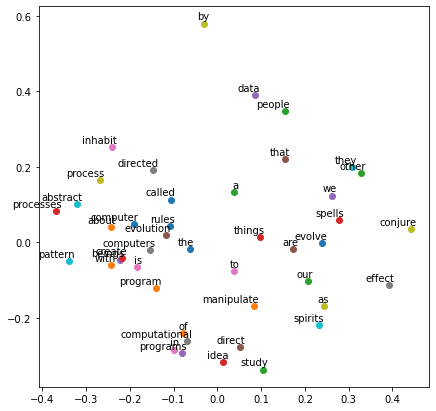

In [133]:
#OUTPUT
plt.figure(figsize=(7,7))
for i,word in enumerate(tokenizer.word_index.keys()):
    x,y=reduced_embeddings[i]
    plt.scatter(x,y)
    plt.annotate(word,xy=(x,y),textcoords='offset points',ha='right', va='bottom',xytext=(5, 2))
    

In [134]:
test_sentenses = [
    "we are to study",
    "create programs direct processes",
    "spirits process study program",
    "idea study people create"
]

In [135]:
for test_sentense in test_sentenses:
    test_words = test_sentense.split(" ")
    print("Words: ", test_words)
    x_test = []
    for i in test_words:
        x_test.append(word_to_index_map.get(i))
    x_test = np.array([x_test])
    print("Indexs: ", x_test)
    test_predictions = model.predict(x_test)
    y_pred = np.argmax(test_predictions[0])
    print("Predictons: ",test_words, " => ", index_to_word_map.get(y_pred))
    print("\n")

Words:  ['we', 'are', 'to', 'study']
Indexs:  [[ 5  6  7 13]]
1/1 [==============================] - 0s 67ms/step
Predictons:  ['we', 'are', 'to', 'study']  =>  about


Words:  ['create', 'programs', 'direct', 'processes']
Indexs:  [[34 35 36  4]]
1/1 [==============================] - 0s 22ms/step
Predictons:  ['create', 'programs', 'direct', 'processes']  =>  to


Words:  ['spirits', 'process', 'study', 'program']
Indexs:  [[40  9 13 32]]
1/1 [==============================] - 0s 20ms/step
Predictons:  ['spirits', 'process', 'study', 'program']  =>  called


Words:  ['idea', 'study', 'people', 'create']
Indexs:  [[14 13 33 34]]
1/1 [==============================] - 0s 18ms/step
Predictons:  ['idea', 'study', 'people', 'create']  =>  programs


